# 函数

**什么是函数**

在数学中，函数可以被定义为一种特殊的关系，其中每个输入值（自变量）都对应着唯一的输出值（因变量）。在形式上，函数通常用 f(x) 表示，其中 x 是自变量，f(x) 是对应的因变量。函数的定义通常包括三个部分：自变量、因变量和对应关系。

- 自变量：自变量是函数中的输入值，通常用 x 表示。它是函数的定义域的一部分，是函数的取值范围。

- 因变量：因变量是函数中的输出值，通常用 f(x) 表示。它是函数的值域的一部分，是函数可能取得的所有输出值的集合。

- 对应关系：对应关系定义了自变量和因变量之间的映射关系，即每个自变量对应唯一的因变量。

定义域（Domain）是指函数可以接受的自变量的所有可能取值的集合，也就是自变量的取值范围。在数学上，它是一个包含所有合法输入的集合。定义域决定了函数的合法输入范围。

值域（Range）是指函数实际上可以取得的所有可能输出值的集合，也就是因变量的取值范围。值域决定了函数的实际输出范围。

例如，对于函数 f(x) = x^2，其定义域为所有实数，因为任何实数都可以作为自变量 x；而其值域为非负实数集合 [0, +∞)，因为平方得到的数总是非负的。

**math模块**

当我们在Python中使用math模块来表示函数时，我们可以定义一个函数，然后使用math模块中的函数来对其进行操作。让我们以函数 f(x) = x^2 为例，来展示如何使用Python的math模块表示这个函数，并计算一些值。

```python
import math

# 定义函数 f(x) = x^2
def f(x):
    return x ** 2

# 计算 f(3)
result = f(3)
print("f(3) =", result)

# 使用math模块中的函数来计算 f(3) 的平方根
square_root = math.sqrt(result)
print("Square root of f(3) =", square_root)
```

在这个示例中，我们首先导入了math模块，然后定义了函数 f(x) = x^2。接着，我们计算了 f(3) 的值，并使用math模块中的sqrt函数来计算其平方根。这样就展示了如何在Python中使用math模块表示函数，并对其进行操作。

当然，对于更复杂的函数，我们可以利用math模块中提供的各种数学函数来进行更多的操作，比如三角函数、对数函数等等。希望这个示例能够帮助你理解如何在Python中使用math模块表示函数。

In [1]:
import math
math.sin(math.pi/2)

1.0

In [2]:
# 可以使用sympy做相同的事情
import sympy
sympy.sin(math.pi/2)

1.00000000000000

这两者是有区别的，math模块可能完成不了sympy才能够完成的功能：

In [5]:
# math
from sympy import Symbol
theta = Symbol('theta')
try:
    math.sin(theta) + sympy.sin(theta)
except TypeError:
    print('Can not convert expression to float')

Can not convert expression to float


In [6]:
# 使用sympy
sympy.sin(theta) + sympy.sin(theta)

2*sin(theta)

# 在SymPy中指定假设

假设我们有一个表达式，然后我们要对这个表达式进行判断：

In [8]:
x = Symbol('x')

try:
    if x + 5 > 0:
        print('Do something')
    else:
        print('Do not do something')
except TypeError:
    print("Can not judge becase the value or domain of x is not given.")

Can not judge becase the value or domain of x is not given.


我们可以在创建x的时候给定一个参数，用来指定正负：

In [9]:
x = Symbol('x', positive = True)
if x + 5 > 0:
    print('Do something')
else:
    print('Do not do something')

Do something


# 计算函数极限值

我们可以绘制 f(x) = 1/x 随着x的值的变化图：

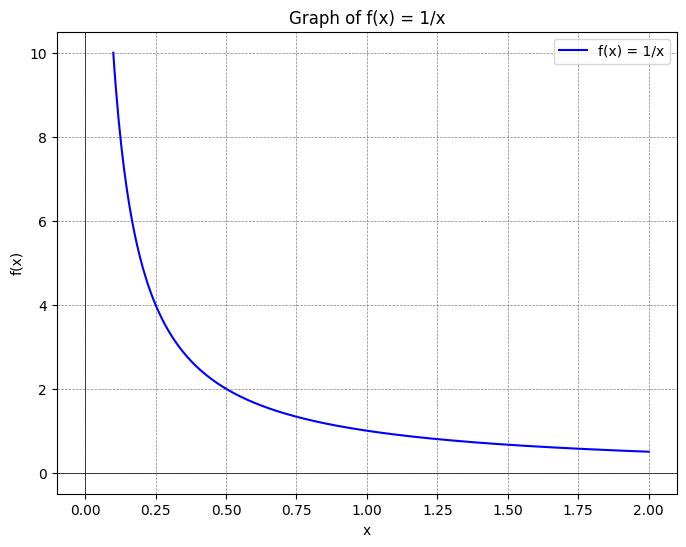

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 定义函数 f(x) = 1/x
def f(x):
    return 1 / x

# 创建一系列 x 值
x = np.linspace(0.1, 2, 400)  # 从0.1到2生成400个均匀间隔的值，避免x为0的情况

# 计算对应的 f(x) 值
y = f(x)

# 绘制图形
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = 1/x', color='b')
plt.title('Graph of f(x) = 1/x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

可以认为，随着x的值的增大，y的值不断的接近0：

$\lim_{{x \to \infty}} \frac{1}{x} = 0$


In [11]:
from sympy import Limit, Symbol, S
x = Symbol('x')
Limit(1/x, x, S.Infinity)

Limit(1/x, x, oo, dir='-')

为了计算极限，我们可以采用doit()函数：

In [12]:
l = Limit(1/x, x, S.Infinity)
l.doit()

0

默认的情况之下，是从正方向来接近的，但是可以指定从负方向来计算：

In [15]:
Limit(1/x, x, 0, dir = '-').doit()

-oo

In [16]:
# 从正方向来贴近
Limit(1/x, x, 0, dir = '+').doit()

oo

# 函数求导

In [17]:
from sympy import Symbol, Derivative

t = Symbol('t')
St = 5*t**2 + 2*t + 8

In [19]:
Derivative(St, t)

Derivative(5*t**2 + 2*t + 8, t)

In [20]:
# 同样使用doit()来进行求导
Derivative(St, t).doit()

10*t + 2

实现求导计算器：

In [21]:
import sympy as sp

# 定义符号变量
x = sp.symbols('x')

def derivative_calculator():
    print("欢迎使用求导计算器！")
    while True:
        function_str = input("请输入要求导的函数（使用x作为变量）或输入'exit'退出：")
        if function_str.lower() == 'exit':
            print("谢谢使用！")
            break
        try:
            # 将用户输入的字符串解析为Sympy表达式
            function = sp.sympify(function_str)
            # 求函数的导数
            derivative = sp.diff(function, x)
            print("函数的导数为：", derivative)
        except sp.SympifyError:
            print("输入的函数格式不正确，请重新输入。")

derivative_calculator()

欢迎使用求导计算器！


请输入要求导的函数（使用x作为变量）或输入'exit'退出： 5 * t ** 2 + 2 * t + 8


函数的导数为： 0


请输入要求导的函数（使用x作为变量）或输入'exit'退出： x**2


函数的导数为： 2*x


请输入要求导的函数（使用x作为变量）或输入'exit'退出： 5 * x ** 2 + 2 * x + 8


函数的导数为： 10*x + 2


请输入要求导的函数（使用x作为变量）或输入'exit'退出： exit


谢谢使用！


# 高阶导数和最大最小值

In [24]:
from sympy import Symbol, solve, Derivative
x = Symbol('x')
f = x ** 5 - 30 * x ** 3 + 50 * x
d1 = Derivative(f, x).doit()

In [25]:
d1

5*x**4 - 90*x**2 + 50

计算 $f'(x) = 0$ 来求得极值：

In [26]:
critical_points = solve(d1)
critical_points

[-sqrt(9 - sqrt(71)),
 sqrt(9 - sqrt(71)),
 -sqrt(sqrt(71) + 9),
 sqrt(sqrt(71) + 9)]

In [31]:
A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]

接着计算二阶导数：

In [28]:
d2 = Derivative(f, x, 2).doit()

In [29]:
d2

20*x*(x**2 - 9)

In [33]:
d2.subs({x:B}).evalf()

127.661060789073

In [34]:
d2.subs({x:C}).evalf()

-127.661060789073

In [35]:
d2.subs({x:A}).evalf()

-703.493179468151

In [36]:
d2.subs({x:D}).evalf()

703.493179468151

# 概率密度函数

概率密度函数在x=1处的取值为：0.241970724519143


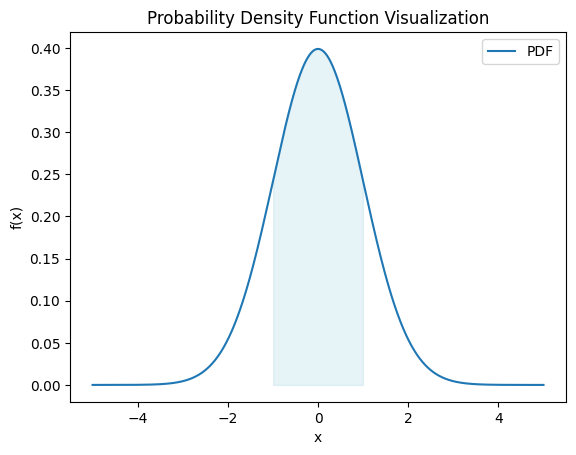

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量
x = sp.symbols('x')

def pdf_evaluation_and_visualization():
    # 定义概率密度函数
    mu = 0  # 均值
    sigma = 1  # 标准差
    pdf = 1/(sp.sqrt(2 * sp.pi * sigma**2)) * sp.exp(-(x - mu)**2 / (2 * sigma**2))

    # 通过Sympy计算概率密度函数在特定点的值
    point = 1
    pdf_value = pdf.subs(x, point)
    print(f"概率密度函数在x={point}处的取值为：{pdf_value.evalf()}")

    # 使用Numpy和Matplotlib进行可视化
    pdf_func = sp.lambdify(x, pdf, 'numpy')
    x_values = np.linspace(-5, 5, 1000)
    y_values = pdf_func(x_values)

    plt.plot(x_values, y_values, label='PDF')
    plt.fill_between(x_values, 0, y_values, where=(x_values>=-1) & (x_values<=1), color='lightblue', alpha=0.3)
    plt.title('Probability Density Function Visualization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

pdf_evaluation_and_visualization()